In [1]:
# import seaborn, pandas, and numpy

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in metric_results_by_gender dataframe

dp_results_gender = pd.read_csv("Results/demographic_parity_metric_results_by_gender_coughvid_data_cv10.csv")

dp_results_gender.rename(columns = {"Female Selection Rate Before" : "Female Before", 
                                    "Male Selection Rate Before" : "Male Before", 
                                    "Female Selection Rate After" : "Female After", 
                                    "Male Selection Rate After" : "Male After",
                                    "Demographic Parity Ratio Gender Before" : "Ratio Before",
                                    "Demographic Parity Ratio Gender After" : "Ratio After", 
                                    "Demographic Parity Difference Gender Before" : "Difference Before",
                                    "Demographic Parity Difference Gender After" : "Difference After"}, 
                         inplace = True)

In [6]:
# define the gender metrics

gender_metrics = {
    "Selection Rate": ["Female Before", "Male Before", "Female After", "Male After"],
    "Demographic Parity Ratio": ["Ratio Before", "Ratio After"],
    "Demographic Parity Difference": ["Difference Before", "Difference After"],
}

In [7]:
# set up the color palette
# red for female, blue for male

palette = {}


for metric, columns in gender_metrics.items():
    for column in columns:
        if "Female" in column:
            palette[column] = plt.cm.Set3(3)
        elif "Male" in column:
            palette[column] = plt.cm.Set3(0)
        elif "Before" in column:
            palette[column] = plt.cm.Set3(3)
        else:
            palette[column] = plt.cm.Set3(0)

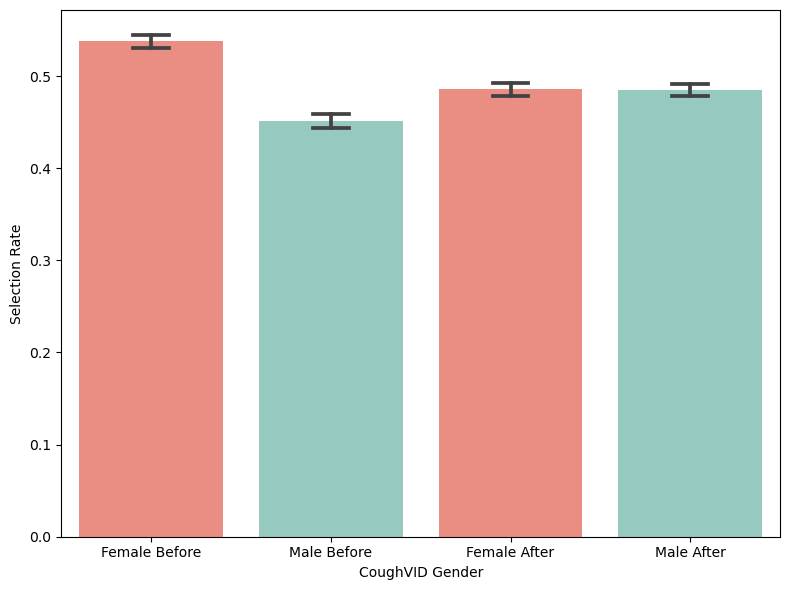

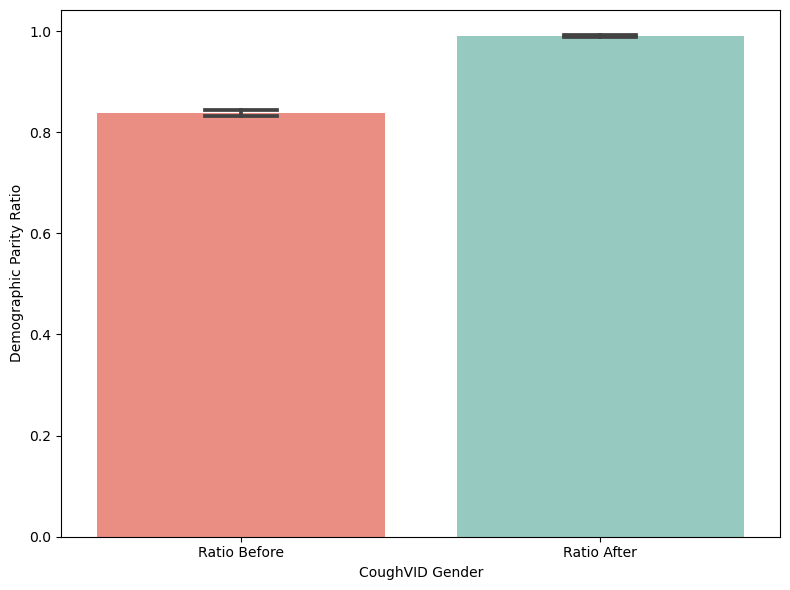

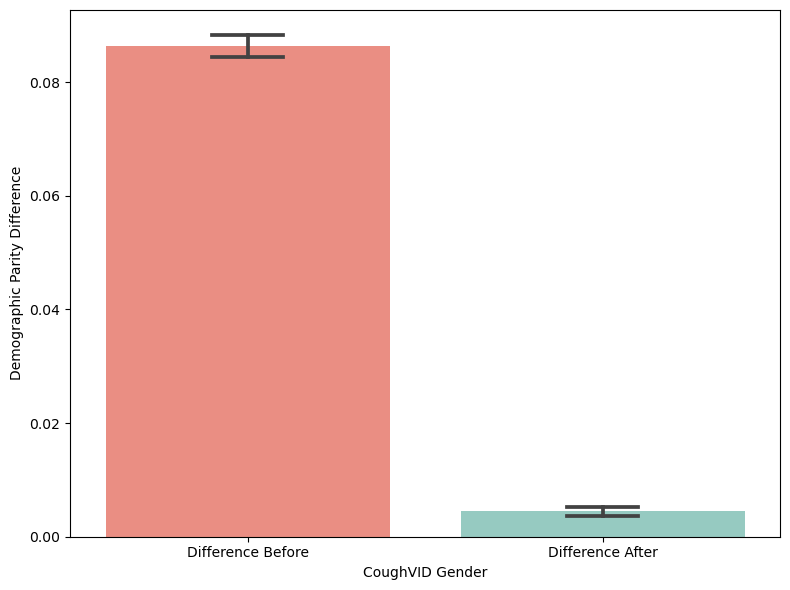

In [8]:
# make barplots with error bars showing standard error
# for DEMOGRAPHIC PARITY

for metric, columns in gender_metrics.items():
    plt.figure(figsize = (8, 6))
    
    dp_results_gender_metric = dp_results_gender[columns]
    dp_results_gender_metric_melted = dp_results_gender_metric.melt(var_name = "Gender", value_name = metric)
    
    sns.barplot(x = "Gender", y = metric, data = dp_results_gender_metric_melted, estimator = np.mean, 
                errorbar = "se", capsize = 0.2, palette = palette)
    
    plt.xlabel("CoughVID Gender")
    plt.ylabel(metric)

    plt.tight_layout()
    
    plt.show()

In [3]:
# load in metric_results_by_age dataframe

dp_results_age = pd.read_csv("Results/demographic_parity_metric_results_by_age_coughvid_data_cv10.csv")
dp_results_age.rename(columns = {"Young Selection Rate Before" : "Young Before", 
                                    "Old Selection Rate Before" : "Old Before", 
                                    "Young Selection Rate After" : "Young After", 
                                    "Old Selection Rate After" : "Old After",
                                    "Demographic Parity Ratio Age Before" : "Ratio Before",
                                    "Demographic Parity Ratio Age After" : "Ratio After", 
                                    "Demographic Parity Difference Age Before" : "Difference Before",
                                    "Demographic Parity Difference Age After" : "Difference After"}, 
                         inplace = True)

In [10]:
# define the age metrics

age_metrics = {
    "Selection Rate": ["Young Before", "Old Before", "Young After", "Old After"],
    "Demographic Parity Ratio": ["Ratio Before", "Ratio After"],
    "Demographic Parity Difference": ["Difference Before", "Difference After"],
}

In [11]:
# set up the color palette
# green for young, yellow for old

palette = {}


for metric, columns in age_metrics.items():
    for column in columns:
        if "Young" in column:
            palette[column] = plt.cm.Set3(6)
        elif "Old" in column:
            palette[column] = plt.cm.Set3(11)
        elif "Before" in column:
            palette[column] = plt.cm.Set3(6)
        else:
            palette[column] = plt.cm.Set3(11)

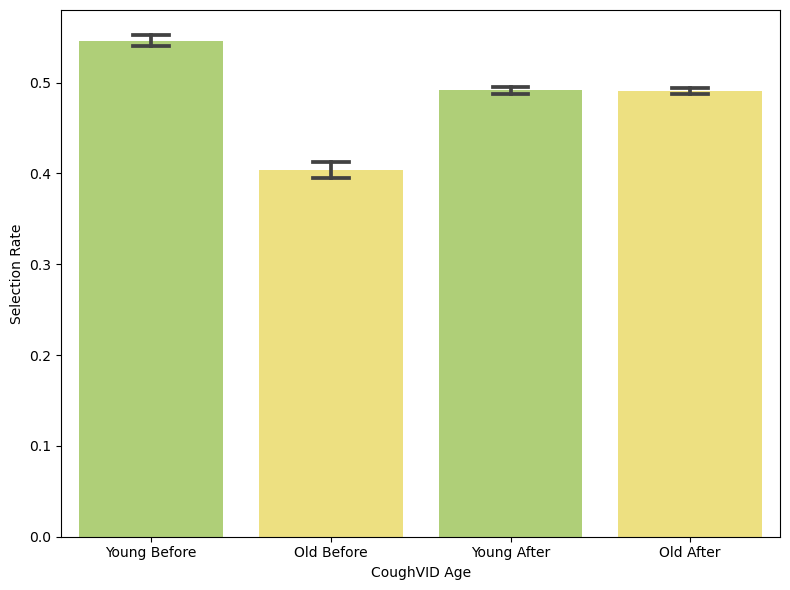

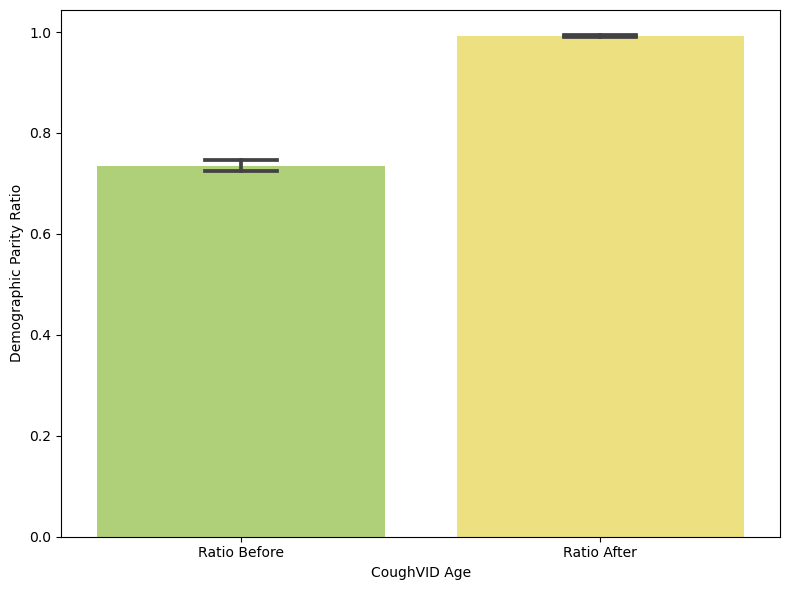

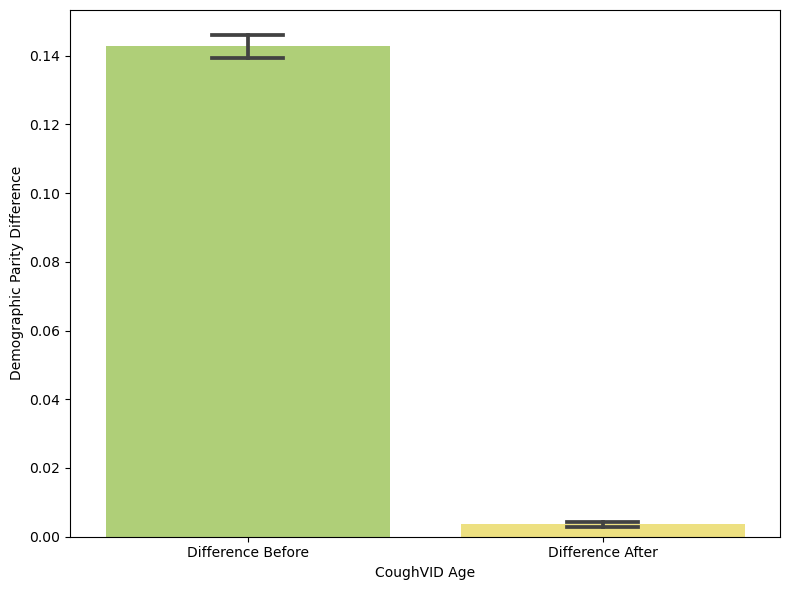

In [12]:
# make barplots with error bars showing standard error

for metric, columns in age_metrics.items():
    plt.figure(figsize = (8, 6))
    
    dp_results_age_metric = dp_results_age[columns]
    dp_results_age_metric_melted = dp_results_age_metric.melt(var_name = "Age", value_name = metric)
    
    sns.barplot(x = "Age", y = metric, data = dp_results_age_metric_melted, estimator = np.mean, 
                errorbar = "se", capsize = 0.2, palette=palette)
    
    plt.xlabel("CoughVID Age")
    plt.ylabel(metric)
    
    plt.tight_layout()
    
    plt.show()